Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b> Шаг 1. Откройте файл с данными и изучите общую информацию </b>

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


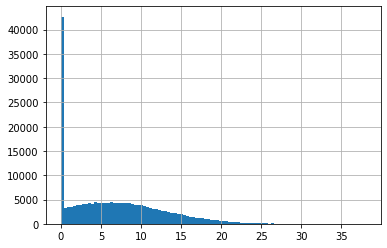

In [1]:
import pandas as pd

df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head())
df_calls.duration.hist(bins=100)
df_calls.info()

Таблица со звонками:
- есть нулевая длительность звонка
- дату нужно перевести в тип дата-время
- округлить длительность звонков до целых в большую сторону
<div class="alert alert-info">
Нулевых значений в длительности звонков много (более 40 тысяч). Они могут соотвествовать сброшенным вызовам, или ситуациям, когда абонент не дозвонился. Поэтому я их не буду удалять, в расчет суммы длительности звонков по месяцам они не внесут вклад, а при общем подсчете звонков пусть останутся, это же тоже были звонки.

In [2]:
df_inter = pd.read_csv('/datasets/internet.csv', index_col=0)
display(df_inter.head())
df_inter.info()
df_inter.mb_used.value_counts()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Таблица  интернетом:
- дату перевести в тип дата-время
- в столбце с мб есть нули
- округлить мегабайты до целых значений в большую сторону

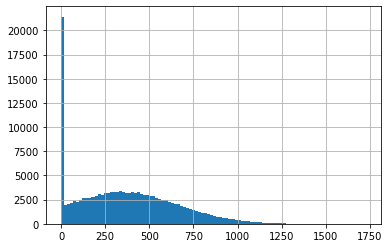

In [3]:
df_inter.mb_used.hist(bins=100)

In [4]:
df_mess = pd.read_csv('/datasets/messages.csv')
display(df_mess.head())
df_mess.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица с сообщениями
- дату перевести в тип дата-время
- пропусков нет

In [5]:
df_tar = pd.read_csv('/datasets/tariffs.csv')
display(df_tar.head())
df_tar.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Описание тарифов
- все нормально

In [6]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head())
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пользователи
- даты прекращения и подключения перевести в тип дата-время
- столбцы с именем, фамилией, возрастом в  исследовании не участвуют - их не буду рассматривать
<div class="alert alert-info">
Пропуски есть только в таблице с прекращением использования тарифа. Они есть у пользователей, которые не заканчивали пользоваться тарифом - это оправдано. Я не буду их заполнять или удалять, тем более, этот столбец мне не понадобится.

In [7]:
df_users = pd.read_csv('/datasets/users.csv')
sorted(df_users.city.unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

<div class="alert alert-info">
Дубликатов в столбце с названиями городов нет. Столбцы с именем, фамилией и возрастом я не рассматривала, так как они в дальнейшем не понадобятся

<b>Шаг 2. Подготовьте данные</b>
Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных.
Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.



In [8]:
import math
import numpy as np

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [9]:
df_inter['session_date'] = pd.to_datetime(df_inter['session_date'], format='%Y-%m-%d')
df_inter['mb_used'] = np.ceil(df_inter['mb_used']).astype('int')
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB


In [10]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В указанных столбцах я заменила тип на дату-время и округлила в большему значения длительности звонков и мегабайтов

In [11]:
#df_inter mb_used
#df_inter = df_inter.drop(df_inter[df_inter['mb_used'] == 0].index)
df_inter = df_inter.drop(df_inter.query('mb_used == 0').index)
df_inter.mb_used.value_counts()

333     231
382     228
377     224
253     222
334     222
       ... 
1324      1
1230      1
1624      1
1222      1
1279      1
Name: mb_used, Length: 1423, dtype: int64

Строки с нулями в столбце с количеством мегабайтов я удаляю, потому что они в расчетах будут давать ноль и не повлияют на результат.
Строки с нулевым временем звонка я оставлю, так как они влияют на количество звонков

<b>Посчитайте для каждого пользователя:</b>
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [12]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls_id = df_calls.pivot_table(index=['user_id', 'month'], values='duration',
                                   aggfunc=['sum', 'count'])

df_mess['month'] = pd.DatetimeIndex(df_mess['message_date']).month
df_mess_id = df_mess.pivot_table(index=['user_id', 'month'], values='id',
                                   aggfunc='count')

df_inter['month'] = pd.DatetimeIndex(df_inter['session_date']).month
df_inter_id = df_inter.pivot_table(index=['user_id', 'month'], values='mb_used',
                                   aggfunc='sum')
df_pivot = df_calls_id.join([df_mess_id, df_inter_id], how='outer').reset_index()
df_pivot.columns = ['user_id', 'month', 'calls_min', 'calls_count', 'messages', 'mb_used']

df_users = df_users[['user_id', 'tariff', 'city']]
df_pivot = df_pivot.merge(df_users, on='user_id', how='outer')

df_pivot = df_pivot.fillna(value=0)
display(df_pivot.head())
df_pivot.info()

,user_id,month,calls_min,calls_count,messages,mb_used,tariff,city
0,1000,5.0,159.0,22.0,22.0,2256.0,ultra,Краснодар
1,1000,6.0,172.0,43.0,60.0,23257.0,ultra,Краснодар
2,1000,7.0,340.0,47.0,75.0,14016.0,ultra,Краснодар
3,1000,8.0,408.0,52.0,81.0,14070.0,ultra,Краснодар
4,1000,9.0,466.0,58.0,57.0,14581.0,ultra,Краснодар


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
user_id        3216 non-null int64
month          3216 non-null float64
calls_min      3216 non-null float64
calls_count    3216 non-null float64
messages       3216 non-null float64
mb_used        3216 non-null float64
tariff         3216 non-null object
city           3216 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


Для каждой из таблиц (по звонкам, сообщениям и интернету) я добавила столбец с месяцем и сделала сводные таблицы для каждого пользователя по месяцам. Затем объединила их в одну, добавив название тарифа и города проживания для пользователей

In [13]:
def proceed_func(row):
    result = 0
    
    if row['tariff'] == 'smart':
        minutes_included = df_tar.loc[0, 'minutes_included']
        rub_per_minute = df_tar.loc[0, 'rub_per_minute']
        mb_per_month_included = df_tar.loc[0, 'mb_per_month_included']
        rub_per_gb = df_tar.loc[0, 'rub_per_gb']
        messages_included = df_tar.loc[0, 'messages_included']
        rub_per_message = df_tar.loc[0, 'rub_per_message']
        rub_monthly_fee = df_tar.loc[0, 'rub_monthly_fee']
        
    elif row['tariff'] == 'ultra':
        minutes_included = df_tar.loc[1, 'minutes_included']
        rub_per_minute = df_tar.loc[1, 'rub_per_minute']
        mb_per_month_included = df_tar.loc[1, 'mb_per_month_included']
        rub_per_gb = df_tar.loc[1, 'rub_per_gb']
        messages_included = df_tar.loc[1, 'messages_included']
        rub_per_message = df_tar.loc[1, 'rub_per_message']
        rub_monthly_fee = df_tar.loc[1, 'rub_monthly_fee']
    
    if row['calls_min'] > minutes_included:
        result += (row['calls_min'] - minutes_included) * rub_per_minute
    
    if row['messages'] > messages_included:
        result += (row['messages'] - messages_included) * rub_per_message
        
    if row['mb_used'] > mb_per_month_included:
        result += math.ceil((row['mb_used'] - mb_per_month_included) / 1024) * rub_per_gb
        
    result += rub_monthly_fee
    return result

df_pivot['proceeds'] = df_pivot.apply(proceed_func, axis=1)
display(df_pivot.head())

,user_id,month,calls_min,calls_count,messages,mb_used,tariff,city,proceeds
0,1000,5.0,159.0,22.0,22.0,2256.0,ultra,Краснодар,1950.0
1,1000,6.0,172.0,43.0,60.0,23257.0,ultra,Краснодар,1950.0
2,1000,7.0,340.0,47.0,75.0,14016.0,ultra,Краснодар,1950.0
3,1000,8.0,408.0,52.0,81.0,14070.0,ultra,Краснодар,1950.0
4,1000,9.0,466.0,58.0,57.0,14581.0,ultra,Краснодар,1950.0


Я нашла помесячную выручку для каждого пользователя, создав функцию и применив ее к сводной таблице с пользователями и их данными по месяцам

<b>Шаг 3. Проанализируйте данные</b>
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Минуты разговора


,тариф,среднее,дисперсия,стандарное отклонение
0,smart,417,36281,190
1,ultra,526,101052,317


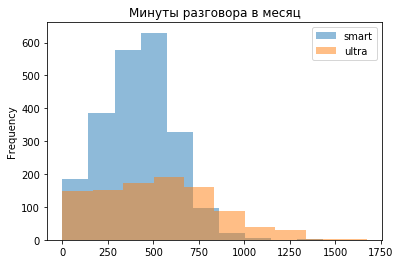

In [14]:
#calls_min
import matplotlib.pyplot as plt

df_pivot.query('tariff == "smart"')['calls_min'].plot(kind='hist', alpha=0.5)
df_pivot.query('tariff == "ultra"')['calls_min'].plot(kind='hist', title='Минуты разговора в месяц', alpha=0.5)
plt.legend(['smart', 'ultra'])

print('Минуты разговора')
d1 = np.var(df_pivot.query('tariff == "smart"')['calls_min'], ddof=1)
d2 = np.var(df_pivot.query('tariff == "ultra"')['calls_min'], ddof=1)
s1 = np.sqrt(d1)
s2 = np.sqrt(d2)
data = [{"тариф":'smart', "среднее":int(df_pivot.query('tariff == "smart"')['calls_min'].mean()),
         "дисперсия":int(d1), "стандарное отклонение":int(s1)},
        {"тариф":'ultra', "среднее":int(df_pivot.query('tariff == "ultra"')['calls_min'].mean()),
         "дисперсия":int(d2), "стандарное отклонение":int(s2)}]
calls = pd.DataFrame(data)
calls

На тарифе Ультра пользователи в среднем больше времени разговаривают по телефону, чем на тарифе Смарт. Гистограмма для Ультра без выраженного пика, возможно, из-за небольшого размера выборки

Количество сообщений


,тариф,среднее,дисперсия,стандарное отклонение
0,smart,33,796,28
1,ultra,49,2285,47


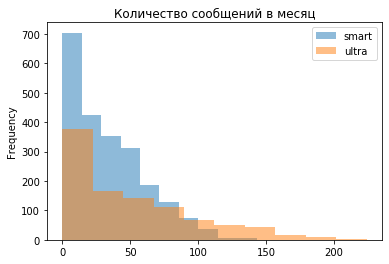

In [15]:
#messages
df_pivot.query('tariff == "smart"')['messages'].plot(kind='hist', alpha=0.5)
df_pivot.query('tariff == "ultra"')['messages'].plot(kind='hist', title='Количество сообщений в месяц', alpha=0.5)
plt.legend(['smart', 'ultra'])

print('Количество сообщений')
d1 = np.var(df_pivot.query('tariff == "smart"')['messages'], ddof=1)
d2 = np.var(df_pivot.query('tariff == "ultra"')['messages'], ddof=1)
s1 = np.sqrt(d1)
s2 = np.sqrt(d2)
data = [{"тариф":'smart', "среднее":int(df_pivot.query('tariff == "smart"')['messages'].mean()),
         "дисперсия":int(d1), "стандарное отклонение":int(s1)},
        {"тариф":'ultra', "среднее":int(df_pivot.query('tariff == "ultra"')['messages'].mean()),
         "дисперсия":int(d2), "стандарное отклонение":int(s2)}]
messages = pd.DataFrame(data)
messages

На тарифе Ультра пользователи в среднем используют больше смс-сообщений, но и стандартное отклонение больше, чем на тарифе Смарт

Интернет-трафик(мб)


,тариф,среднее,дисперсия,стандарное отклонение
0,smart,16221,34648523,5886
1,ultra,19467,102217264,10110


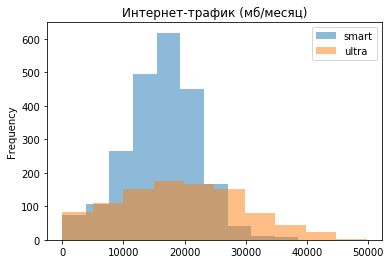

In [16]:
#mb_used
df_pivot.query('tariff == "smart"')['mb_used'].plot(kind='hist', alpha=0.5)
df_pivot.query('tariff == "ultra"')['mb_used'].plot(kind='hist', title='Интернет-трафик (мб/месяц)', alpha=0.5)
plt.legend(['smart', 'ultra'])

print('Интернет-трафик(мб)')
d1 = np.var(df_pivot.query('tariff == "smart"')['mb_used'], ddof=1)
d2 = np.var(df_pivot.query('tariff == "ultra"')['mb_used'], ddof=1)
s1 = np.sqrt(d1)
s2 = np.sqrt(d2)
data = [{"тариф":'smart', "среднее":int(df_pivot.query('tariff == "smart"')['mb_used'].mean()),
         "дисперсия":int(d1), "стандарное отклонение":int(s1)},
        {"тариф":'ultra', "среднее":int(df_pivot.query('tariff == "ultra"')['mb_used'].mean()),
         "дисперсия":int(d2), "стандарное отклонение":int(s2)}]
internet = pd.DataFrame(data)
internet

На тарифе Ультра пользователи в среднем используют больше интернет-трафика, но и стандартное отклонение больше, чем на тарифе Смарт.

<div class="alert alert-info">
Так же я заметила, что ни звонки, ни смс для тарифа Ультра даже не доходят до лимита, установленного по тарифу (звонки максимально за месяц около 1600 при лимите 3000, а смс чуть больше 200 при лимите 1000)

Отношение количества пользователей Смарт к Ультра: 2.261663286004057
Отношение всей выручки от Смарт к Ультра: 1.4135022894781948
Выручка


,тариф,среднее,дисперсия,стандарное отклонение
0,smart,1294,673877,820
1,ultra,2070,143360,378


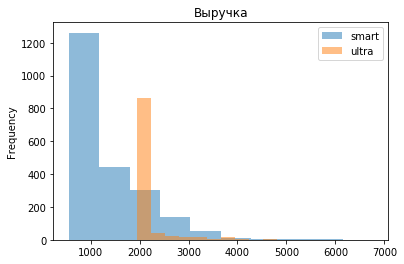

In [17]:
#proceeds
df_pivot.query('tariff == "smart"')['proceeds'].plot(kind='hist', alpha=0.5)
df_pivot.query('tariff == "ultra"')['proceeds'].plot(kind='hist', title='Выручка', alpha=0.5)
plt.legend(['smart', 'ultra'])

print('Отношение количества пользователей Смарт к Ультра:', 
      df_pivot.query('tariff == "smart"')['user_id'].count() / df_pivot.query('tariff == "ultra"')['user_id'].count())
print('Отношение всей выручки от Смарт к Ультра:', 
      sum(df_pivot.query('tariff == "smart"')['proceeds']) / sum(df_pivot.query('tariff == "ultra"')['proceeds']))

print('Выручка')
d1 = np.var(df_pivot.query('tariff == "smart"')['proceeds'], ddof=1)
d2 = np.var(df_pivot.query('tariff == "ultra"')['proceeds'], ddof=1)
s1 = np.sqrt(d1)
s2 = np.sqrt(d2)
data = [{"тариф":'smart', "среднее":int(df_pivot.query('tariff == "smart"')['proceeds'].mean()),
         "дисперсия":int(d1), "стандарное отклонение":int(s1)},
        {"тариф":'ultra', "среднее":int(df_pivot.query('tariff == "ultra"')['proceeds'].mean()),
         "дисперсия":int(d2), "стандарное отклонение":int(s2)}]
proceeds = pd.DataFrame(data)
proceeds

<div class="alert alert-info">

- Количество пользователей тарифа Смарт в 2.3 раза больше, чем пользователей тарифа Ультра. Поэтому, я думаю, во всех приведенных расчетах (кроме выручки) дисперсия и стандартное отклонение для тарифа Ультра больше.
- Вся выручка по тарифу Смарт за 2018 год в 1.4 раза больше, чем по тарифу Ультра
- В то же время, средняя выручка по Ультра больше, чем по Смарт (потому что пользователей на Ультра меньше). А вот дисперсия и стандартное отклонение для Смарт больше, потому что разброс значений выручки гораздо шире - от цены самого тарифа в 550 рублей до примерно 6000

,город,среднее,дисперсия,стандарное отклонение
0,москва,1550,566183,752
1,другие,1528,656697,810


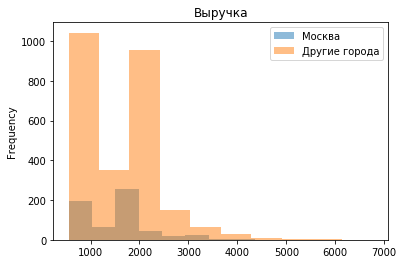

In [18]:
df_pivot.query('city == "Москва"')['proceeds'].plot(kind='hist', alpha=0.5)
df_pivot.query('city != "Москва"')['proceeds'].plot(kind='hist', title='Выручка', alpha=0.5)
plt.legend(['Москва', 'Другие города'])

d1 = np.var(df_pivot.query('city == "Москва"')['proceeds'], ddof=1)
d2 = np.var(df_pivot.query('city != "Москва"')['proceeds'], ddof=1)
s1 = np.sqrt(d1)
s2 = np.sqrt(d2)
data = [{"город":'москва', "среднее":int(df_pivot.query('city == "Москва"')['proceeds'].mean()),
         "дисперсия":int(d1), "стандарное отклонение":int(s1)},
        {"город":'другие', "среднее":int(df_pivot.query('city != "Москва"')['proceeds'].mean()),
         "дисперсия":int(d2), "стандарное отклонение":int(s2)}]
proceeds = pd.DataFrame(data)
proceeds

<div class="alert alert-info">

Можно сказать, что выборки, стратифицированные по городам (Москва и остальные города), похожи. Дисперсия, среднее и стандарное отклонение для двух выборок тоже мало различаются. Выборка для Москвы меньше, чем для других городов, этим можно объяснить небольшие отличия.

<b>Шаг 4. Проверьте гипотезы</b>
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

<div class="alert alert-info">
<b>Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</b>
- В качестве нулевой гипотезы была выбрана: средние выручки пользователей Смарт и Ультра равны
- Альтернативная гипотеза: средние выручки отличаются
- Тест двухсторонний, так как значения могут отличаться и в большую, и в меньшую сторону
- equal_var=False, так как выборки отличаются *я сужу по гистограммам, среднему и дисперсии - это все разное*

In [25]:
from math import factorial
from scipy import stats as st

alpha1 = 0.05
r1 = st.ttest_ind(df_pivot.query('tariff == "smart"')['proceeds'],
                 df_pivot.query('tariff == "ultra"')['proceeds'], equal_var=False)
print(df_pivot.query('tariff == "smart"')['proceeds'])
print(r1)

8       1350.0
9        550.0
10       550.0
11      1150.0
12      1550.0
         ...  
3210     550.0
3211    1150.0
3212    1513.0
3213     598.0
3215     550.0
Name: proceeds, Length: 2230, dtype: float64
Ttest_indResult(statistic=-36.70976682067519, pvalue=1.2414049931248708e-246)


<div class="alert alert-info">
<b>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</b>
- Отклоняем нулевую гипотезу - выручки отличаются

<div class="alert alert-info">
<b>Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</b>
- В качестве нулевой гипотезы была выбрана: средние выручки пользователей из разных городов равны
- Альтернативная гипотеза: средние выручки отличаются для Москвы и других городов
- Тест двухсторонний, так как значения могут отличаться и в большую, и в меньшую сторону
- equal_var=True, так как выборки похожи

In [22]:
alpha2 = 0.05
r2 = st.ttest_ind(df_pivot.query('city == "Москва"')['proceeds'],
                 df_pivot.query('city != "Москва"')['proceeds'])
#if r2.pvalue < alpha2:
#    print('Средняя выручка пользователей из Москвы отличается от выручки из других регионов')
#else:
#    print('Средняя выручка пользователей из Москвы не отличается от выручки из других регионов {:.5f}'.format(r2.pvalue))
print(r2)

Ttest_indResult(statistic=0.631543763165892, pvalue=0.5277299573181309)


<div class="alert alert-info">
<b>Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов</b>
- Нет оснований отклонить нулевую гипотезу - выручки не отличаются

<b>Шаг 5. Напишите общий вывод</b>

Было проанализировано поведение клиентов на тарифных планах: «Смарт» и «Ультра» на небольшой выборке.
Полученные выводы:
- Пользователи тарифа Ультра в среднем больше говорят по телефону, больше используют смс и интернет
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Тариф Ультра приносит больше выручки на одного пользователя в среднем, чем тариф Смарт. Но тарифом Смарт пользуются в два раза больше клиентов, поэтому суммарная выручка от тарифа Смарт превышает выручку от Ультра почти в полтора раза (на небольшой выборке). Так же у тарифа Ультра установлены очень большие лимиты, в разы превышающие используемое количество минут и смс.
Поэтому я предлагаю вкладываться в развитие тарифа Смарт, как более популярного.